## **EDA | Разведочный анализ данных**

In [52]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz 
from sklearn.ensemble import VotingClassifier
import os

In [53]:
path = ''
samples_path = os.path.join(path, "data", "beeline_antispam_hakaton_id_samples.csv")
samples = pd.read_csv(samples_path)
samples.head()

,id,target,split
0,196535,NaN,test
1,63075900,2.0,train
2,35233935,2.0,train
3,23557360,4.0,train
4,78926486,NaN,test


In [54]:
data_path = os.path.join(path, 'data', 'time_key=2021-11-01.csv')
data = pd.read_csv(data_path)
data.head()            

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key
0,67596082,43588153,18:43:03,3,0,0,3,0,1,10,2021-11-01
1,4024969,67656553,11:43:20,4,206,0,5,1,0,10,2021-11-01
2,43166780,31861625,10:32:36,0,5,0,0,0,1,10,2021-11-01
3,51817902,41201237,13:45:02,3,0,0,0,0,1,10,2021-11-01
4,41812796,4932754,13:53:12,0,0,0,5,0,1,10,2021-11-01


Выделим фичи из датасета и поделим их на числовые и категориальные.

In [55]:
num_cols = [
    'start_time_local',
    'duration',
    'num_b_length',
    'time_key'
]

cat_cols = [
    'id_a',
    'id_b',
    'time_zone',
    'forward',
    'zero_call_flg',
    'source_b',
    'source_f',
]

cols = num_cols + cat_cols
data = data[cols]


Посмотрим на пропущенные значения и уберем их при необходимости

In [56]:
data.isna().any()

start_time_local    False
duration            False
num_b_length        False
time_key            False
id_a                False
id_b                False
time_zone           False
forward             False
zero_call_flg       False
source_b            False
source_f            False
dtype: bool

In [57]:
data.fillna(inplace=True, method='ffill')

In [58]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46235 entries, 0 to 46234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      46235 non-null  int64  
 1   target  36942 non-null  float64
 2   split   46235 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [59]:
data = pd.read_csv('./data/time_key=2021-11-01.csv')
data.head()                  

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key
0,67596082,43588153,18:43:03,3,0,0,3,0,1,10,2021-11-01
1,4024969,67656553,11:43:20,4,206,0,5,1,0,10,2021-11-01
2,43166780,31861625,10:32:36,0,5,0,0,0,1,10,2021-11-01
3,51817902,41201237,13:45:02,3,0,0,0,0,1,10,2021-11-01
4,41812796,4932754,13:53:12,0,0,0,5,0,1,10,2021-11-01


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331822 entries, 0 to 1331821
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   id_a              1331822 non-null  int64 
 1   id_b              1331822 non-null  int64 
 2   start_time_local  1331822 non-null  object
 3   time_zone         1331822 non-null  int64 
 4   duration          1331822 non-null  int64 
 5   forward           1331822 non-null  int64 
 6   zero_call_flg     1331822 non-null  int64 
 7   source_b          1331822 non-null  int64 
 8   source_f          1331822 non-null  int64 
 9   num_b_length      1331822 non-null  int64 
 10  time_key          1331822 non-null  object
dtypes: int64(9), object(2)
memory usage: 111.8+ MB


## Распределение звонков по локальному времени


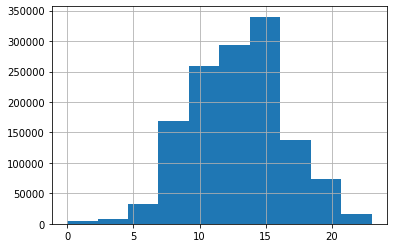

In [61]:
hours_distributions = data['start_time_local'].str.slice(0, 2).astype(int)
fig = hours_distributions.hist().get_figure()

## Распределение звонков по UTC:

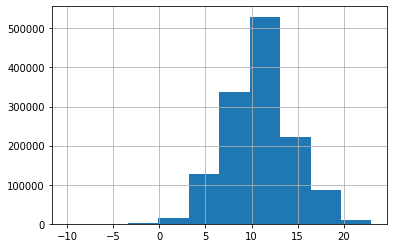

In [62]:
hours_distributions_UTS = hours_distributions - data['time_zone'].astype(int)
fig = hours_distributions_UTS.hist().get_figure()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
    <font size="4", color="DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br><br>
    <font size="3", color="black">
        Опять же такие исследования нужно делать в EDA и с графиками
    </font>
<div>

**Посмотрим на распределение фичей**

In [63]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    # TODO: спросить, как визуализировать эти распределения
    # plt.pie(data[cat_cols].value_counts())
    # plt.show() 
    print()
    print()

id_a DISTRIBUTION
6325350     265523
1741727     180888
51817902     93768
52273536     45811
41812796     42490
             ...  
31919997         1
59481579         1
63213499         1
37300712         1
62479808         1
Name: id_a, Length: 12166, dtype: int64


id_b DISTRIBUTION
5137773     23715
67511626     1777
7055569      1575
70502169     1398
3969649       965
            ...  
41594773        1
29537701        1
75321457        1
61793726        1
33446067        1
Name: id_b, Length: 1038544, dtype: int64


time_zone DISTRIBUTION
 3     790559
 0     461009
 4      32572
 2      25294
 7      16162
 5       3060
 1       1598
 8        542
-1        460
 10       325
 6        129
 11        59
 9         45
 12         8
Name: time_zone, dtype: int64


forward DISTRIBUTION
0    1209219
1     122603
Name: forward, dtype: int64


zero_call_flg DISTRIBUTION
0    756275
5    468780
2     33779
1     33327
3     29161
4     10500
Name: zero_call_flg, dtype: int64


source_b

**Визуализируем распределение категориальных фичей**

Распределение часовых зон:


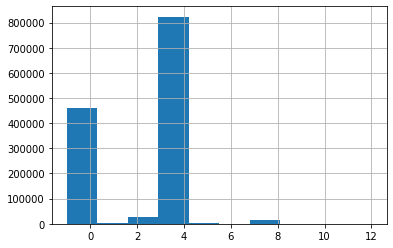

In [64]:
h = data['time_zone'].hist()
fig = h.get_figure()

Распределение категории звонка с нулевой длительностью:

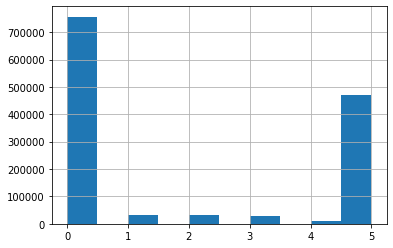

In [65]:
h = data['zero_call_flg'].hist()
fig = h.get_figure()

**Визуализация распределения целевых переменных**

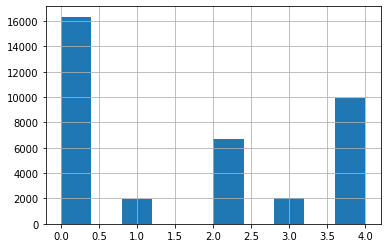

In [66]:
h = samples['target'].hist()
fig = h.get_figure()